#**Differential expression analysis with DEseq2**
###Master's thesis "Investigating the transcriptional effects of divergent CTCF orthologs using RNA-seq" 
###H. Scherrer

R script to analyze RNA-seq data of ... compared to OsTir1/CTCF-AID WT cells (B11.AID)
1. OsTir1/CTCF-AID depleted cells (B11.AID.IAA) 
2. *Ciona robusta* CTCF ortholog replacement cells (crCTCF.aux) 
3. *Danio rerio* CTCF ortholog replacement cells (drCTCF.aux)

Script is representative for differential expression analysis of RNA-seq data set compromising
G4 WT cells (parental cell line), OsTir1/CTCF-AID WT cells (untreated), and OsTir1/CTCF-AID depleted cells (auxin-treated)

#####First load required packages

In [5]:
library(DESeq2)
library(dplyr)

#####Import raw count matrix (Salmon) for DEseq2

In [5]:
counts <- as.matrix(read.table('counts_from_SALMON.genes.tsv', header = T, sep = '\t'))
head(counts, 3)

,crCTCF.aux.rep1,crCTCF.aux.rep2,drCTCF.aux.rep1,drCTCF.aux.rep2,B11.AID.rep1,B11.AID.rep2,B11.AID.IAA.rep1,B11.AID.IAA.rep2
ENSMUST00000120945.2,0,0,0,0,0,0,0,0
ENSMUST00000120391.2,0,0,0,0,0,0,0,0
ENSMUST00000122466.2,0,0,0,0,0,1,0,0


#####Provide information sheet of samples

In [6]:
colData <- read.table('colData.tsv', header = T, sep = '\t', 
                      stringsAsFactors = TRUE)
print(colData)

                         group       IAA condition
crCTCF.aux.rep1          Ciona   treated    mutant
crCTCF.aux.rep2          Ciona   treated    mutant
drCTCF.aux.rep1          Danio   treated    mutant
drCTCF.aux.rep2          Danio   treated    mutant
B11.AID.rep1      CTCF control untreated   control
B11.AID.rep2      CTCF control untreated   control
B11.AID.IAA.rep1 CTCF depleted   treated   control
B11.AID.IAA.rep2 CTCF depleted   treated   control


#####Ensure that rownames of 'colData' correspond to column names of 'counts'

In [8]:
all(rownames(colData) == colnames(counts))

[1] TRUE

#####Construct the DEseq2 data set object

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts, 
                              colData = colData, 
                              design = ~ group)

#####Filter out genes with no reads

In [10]:
dds <- dds[rowSums(DESeq2::counts(dds)) >= 1,]

####**Run differential expression analysis**

In [ ]:
dds <- DESeq(dds)

#####Build results table with the first condition of interest (**1**)


out of 85205 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 112, 0.13%
LFC < -1.00 (down) : 120, 0.14%
outliers [1]       : 0, 0%
low counts [2]     : 39646, 47%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



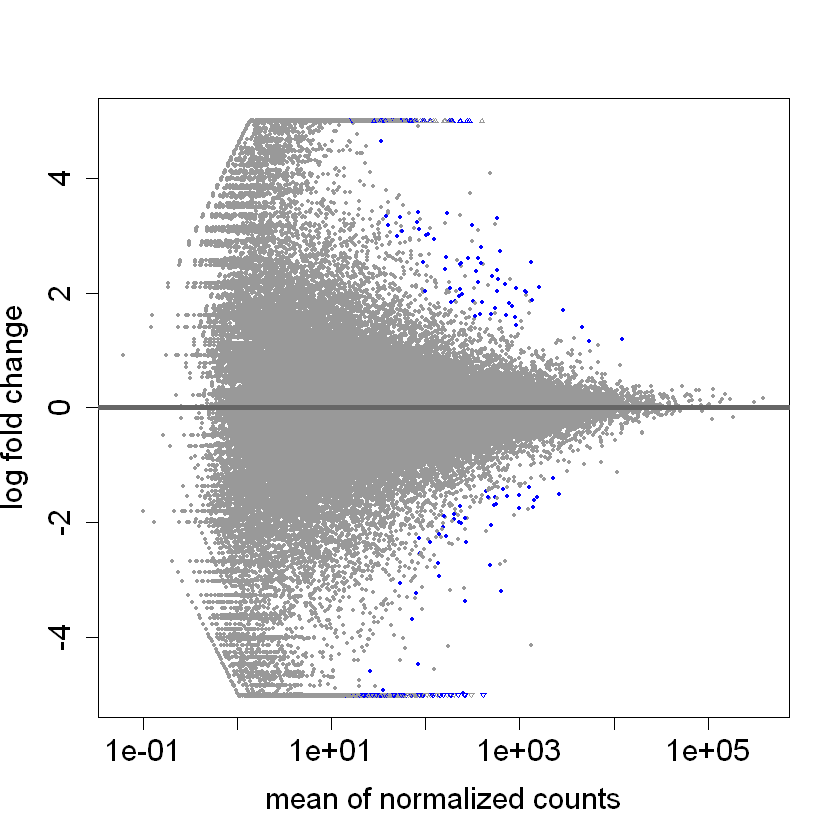

In [40]:
results_CTCF <- results(dds, contrast=c('group', 'CTCF control', 'CTCF depleted'), alpha = 0.05, lfcThreshold = 1)
summary(results_CTCF)
plotMA(results_CTCF, ylim = c(-5,5), cex.axis = 1.5, cex.lab = 1.5)

#####Subset results table with significant differentially expressed genes (**1**)

In [ ]:
results_CTCF_table <- data.frame(results_CTCF); subset(results_CTCF_table, log2FoldChange <= -1.0 & padj <= 0.05 | log2FoldChange >= 1.0 & padj <= 0.05)

#####Build results table with the second condition of interest (**2**)


out of 85205 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 257, 0.3%
LFC < -1.00 (down) : 242, 0.28%
outliers [1]       : 0, 0%
low counts [2]     : 42950, 50%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



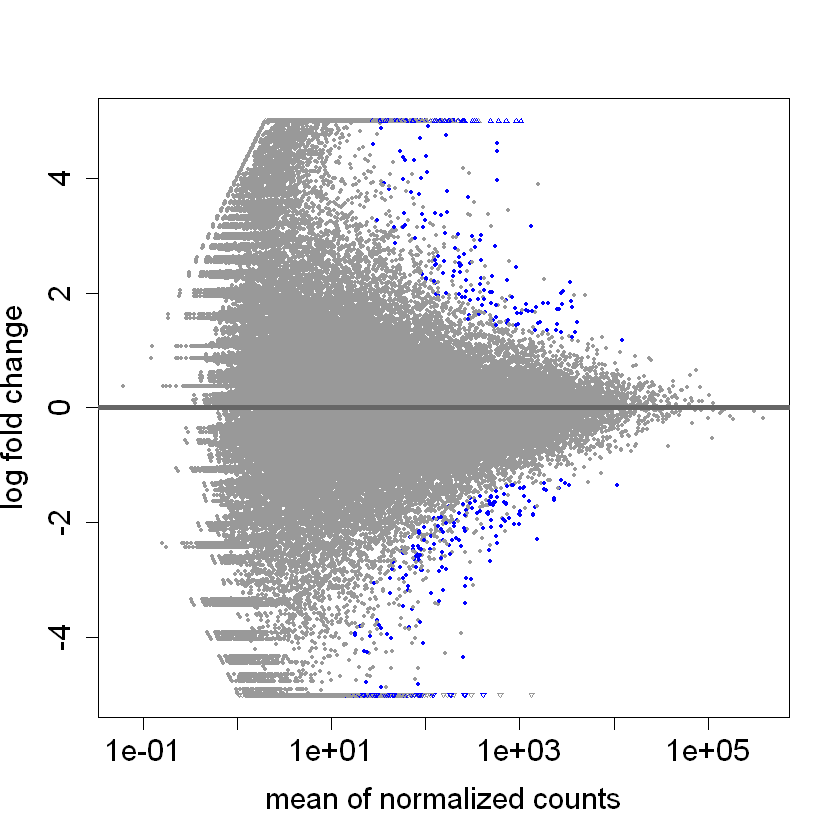

In [41]:
results_Ciona <- results(dds, contrast=c('group', 'CTCF control', 'Ciona'),  alpha = 0.05, lfcThreshold = 1)
summary(results_Ciona)
plotMA(results_Ciona, ylim = c(-5,5), cex.axis = 1.5, cex.lab = 1.5)

#####Subset results table with significant differentially expressed genes (**2**)

In [ ]:
results_Ciona_table <- data.frame(results_Ciona); subset(results_Ciona_table, log2FoldChange <= -1.0 & padj <= 0.05 | log2FoldChange >= 1.0 & padj <= 0.05)

#####Build results table with the third condition of interest (**3**)


out of 85205 with nonzero total read count
adjusted p-value < 0.05
LFC > 1.00 (up)    : 169, 0.2%
LFC < -1.00 (down) : 110, 0.13%
outliers [1]       : 0, 0%
low counts [2]     : 42950, 50%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



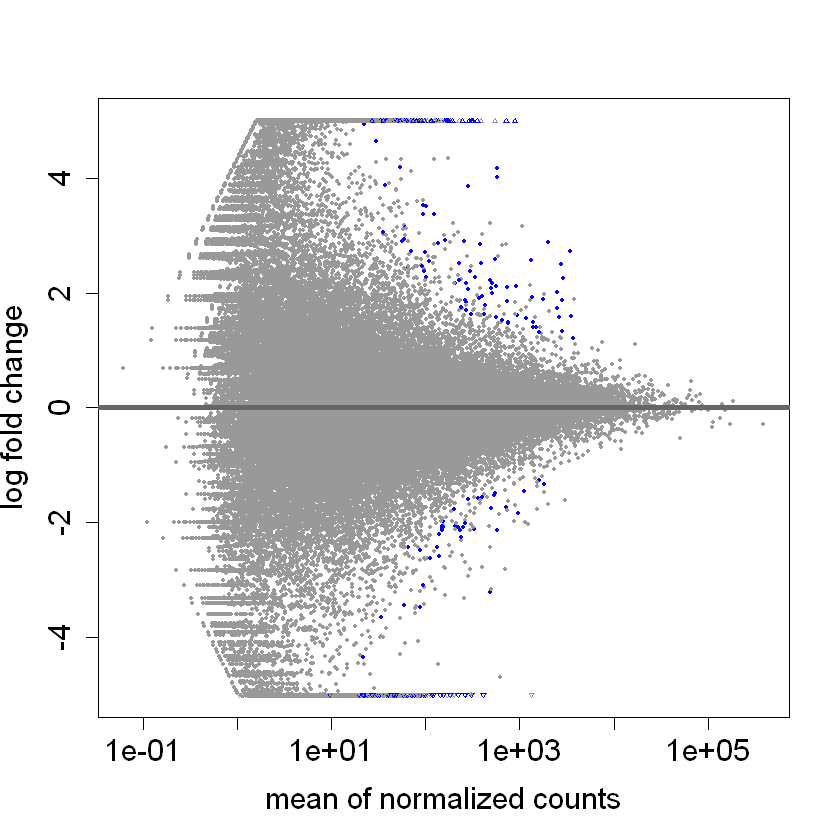

In [43]:
results_Danio <- results(dds, contrast=c('group', 'CTCF control', 'Danio'),  alpha = 0.05, lfcThreshold = 1)
summary(results_Danio)
plotMA(results_Danio, ylim = c(-5,5), cex.axis = 1.5, cex.lab = 1.5)

#####Subset results table with significant differentially expressed genes (**3**)

In [ ]:
results_Danio_table <- data.frame(results_Danio); subset(results_Danio_table, log2FoldChange <= -1.0 & padj <= 0.05 | log2FoldChange >= 1.0 & padj <= 0.05)